In [672]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install seaborn
!pip install pandas statsmodels


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [673]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [788]:
df = pd.read_csv(r"C:\Kuliah Semester 4\Akademik\Probabilitas dan Statitiska\Dataset\archive (7)\exams.csv")
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [789]:
df['parental level of education']

0            some college
1      associate's degree
2            some college
3            some college
4      associate's degree
              ...        
995          some college
996          some college
997           high school
998           high school
999           high school
Name: parental level of education, Length: 1000, dtype: object

In [790]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [792]:
df.shape

(1000, 8)

In [793]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [794]:
##bahan analisis univariat
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


In [795]:
##output merah tetap aman karena tidak ada duplikat value
df[df.duplicated()].shape

(0, 8)

In [796]:
df.memory_usage(deep=True)

Index                            132
gender                         61984
race/ethnicity                 64000
parental level of education    71467
lunch                          66360
test preparation course        62720
math score                      8000
reading score                   8000
writing score                   8000
dtype: int64

In [797]:
##ganti semua spasi tiap nama kolom dengan underscore
df.columns = df.columns.str.replace(' ', '_')

In [798]:
##dua cell ke bawah, buat memperkecil memory
cat_features = [col for col in df.columns if df[col].dtype=='0']
cat_features

[]

In [799]:
for category in cat_features:
    df[category] = df[category].astype('category')
df.memory_usage(deep=True)

Index                            132
gender                         61984
race/ethnicity                 64000
parental_level_of_education    71467
lunch                          66360
test_preparation_course        62720
math_score                      8000
reading_score                   8000
writing_score                   8000
dtype: int64

In [800]:
#cek null value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [801]:

df["test_prep_map"] = np.where(df['test_preparation_course'] == 'completed',1,0)
df["lunch_map"] = np.where(df['lunch'] == 'standard',1,0)
# Menggunakan .map() untuk konversi
education_mapping = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school": 1
}

df['parental_level_of_education'] = df['parental_level_of_education'].map(education_mapping)


In [802]:
df.describe()

,parental_level_of_education,math_score,reading_score,writing_score,test_prep_map,lunch_map
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.070000,67.810000,70.382000,69.140000,0.344000,0.660000
std,1.489738,15.250196,14.107413,15.025917,0.475279,0.473946
min,1.000000,15.000000,25.000000,15.000000,0.000000,0.000000
25%,2.000000,58.000000,61.000000,59.000000,0.000000,0.000000
50%,3.000000,68.000000,70.500000,70.000000,0.000000,1.000000
75%,4.000000,79.250000,80.000000,80.000000,1.000000,1.000000
max,6.000000,100.000000,100.000000,100.000000,1.000000,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


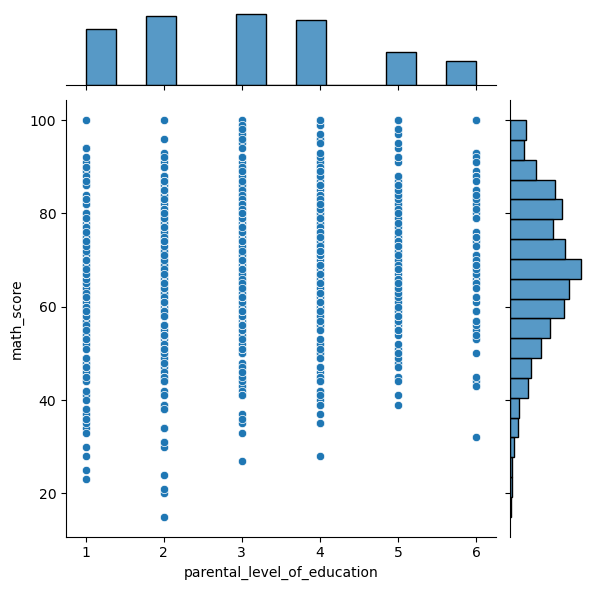

In [803]:
##tinjau inferensi variabel bebas dan terikat dari sisi grafik
##1. parental education terhadap math_score
sns.jointplot(x='parental_level_of_education', y='math_score', data=df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


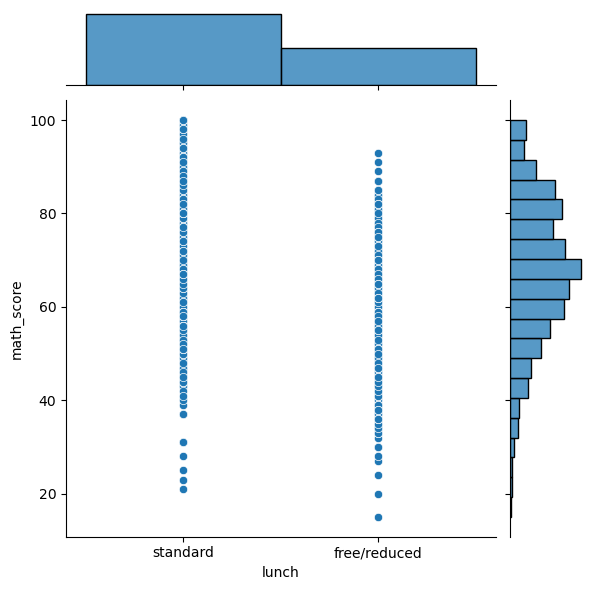

In [804]:
##2. lunch terhadap writing_score
sns.jointplot(x='lunch', y='math_score', data=df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


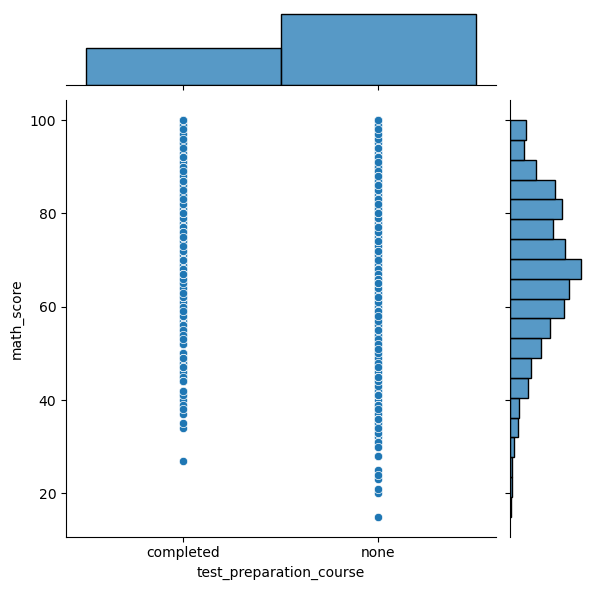

In [805]:
##3. test prepartion course terhadap math_score
sns.jointplot(x='test_preparation_course', y='math_score', data=df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

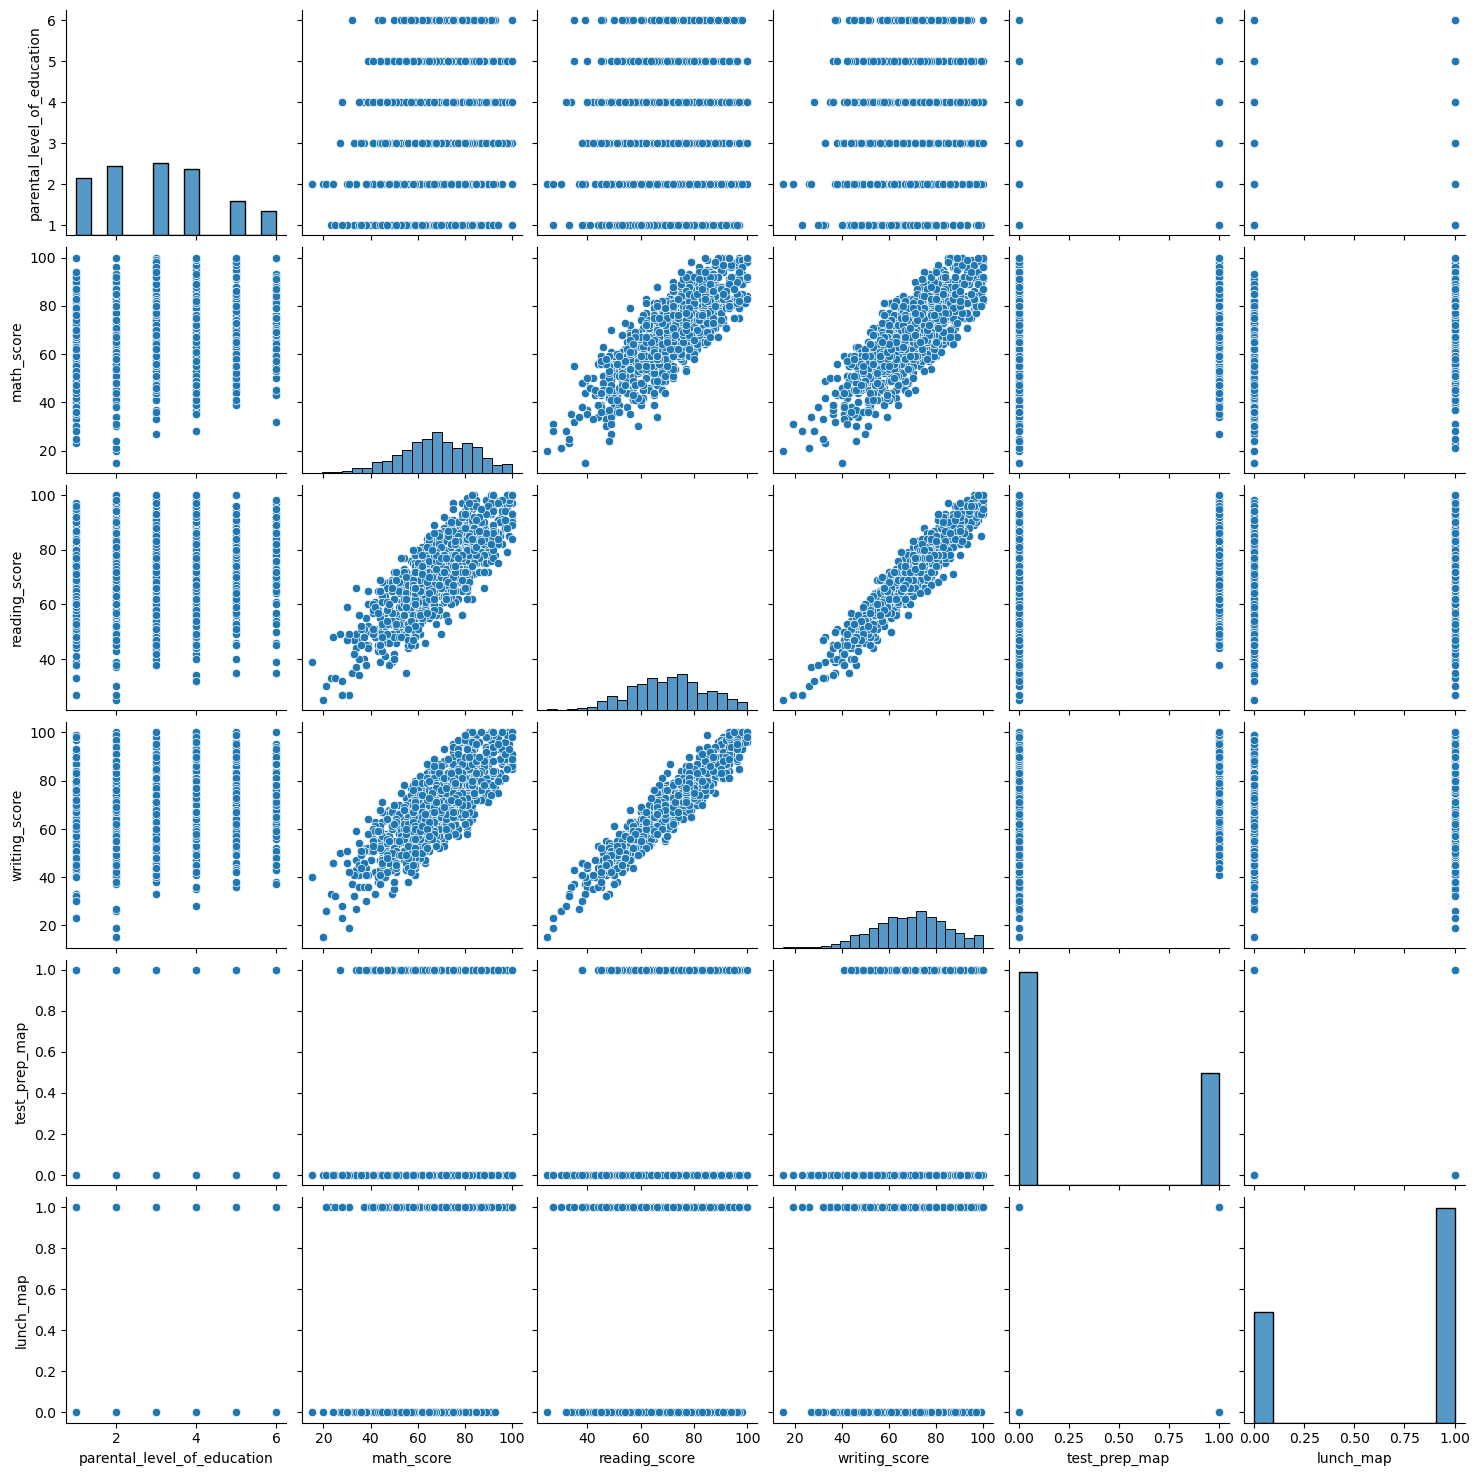

In [806]:
##analisis inference antara variabel terikat
sns.pairplot(df)

In [807]:
##OBSERVASI SAMPEL/CEK SAMPEL
np.percentile(df.parental_level_of_education,[90])

array([5.])

In [808]:
##OBSERVASI SAMPEL/CEK SAMPEL
##Value pertama dari observasi sampel /cek sampel
np.percentile(df.parental_level_of_education,[90])[0]

5.0

In [809]:
##OBSERVASI SAMPEL/CEK SAMPEL
##ngitung persentil ke 90 dari kolom tsb
##[0] dipakai untuk mengambil nilai  pertama dar kolom tersebut
uv = np.percentile(df.parental_level_of_education,[90])[0]

In [810]:
##OBSERVASI SAMPEL/CEK SAMPEL
##cek sampel pada variabel bebas ( diambil variabel bebas karena tujuannya adalah untuk menghindari ketidakakuratan )
##cek sampel pada variabel terikat ( lebih ke arah prediksi )
df[(df.parental_level_of_education>uv)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,test_prep_map,lunch_map
11,male,group B,6,standard,none,53,50,49,0,1
14,male,group C,6,free/reduced,none,55,54,52,0,0
15,male,group E,6,free/reduced,none,56,46,43,0,0
33,female,group D,6,free/reduced,none,32,35,37,0,0
39,male,group E,6,standard,none,89,85,78,0,1
...,...,...,...,...,...,...,...,...,...,...
913,female,group D,6,standard,none,69,67,78,0,1
920,male,group E,6,standard,none,91,82,74,0,1
965,male,group C,6,free/reduced,none,45,53,45,0,0
986,male,group D,6,standard,none,88,72,78,0,1


In [811]:
##OBSERVASI SAMPEL/CEK SAMPEL
##mencegah nilai yang diinput terduplikat (output merah gpp )
df.parental_level_of_education[(df.parental_level_of_education > 2*uv)] = 2*uv

C:\Users\alwan\AppData\Local\Temp\ipykernel_28104\703010459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.parental_level_of_education[(df.parental_level_of_education > 2*uv)] = 2*uv


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


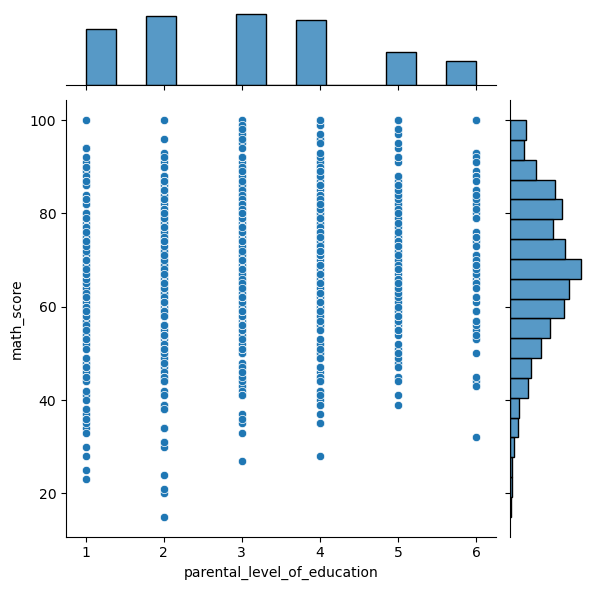

In [812]:
sns.jointplot(x="parental_level_of_education", y="math_score", data=df)

In [813]:
##OBSERVASI SAMPEL/CEK SAMPEL
np.percentile(df.lunch_map,[90])

array([1.])

In [814]:
##OBSERVASI SAMPEL/CEK SAMPEL
np.percentile(df.lunch_map,[90])[0]

1.0

In [815]:
##OBSERVASI SAMPEL/CEK SAMPEL
uv = np.percentile(df.lunch_map,[90])[0]

In [816]:
df[(df.lunch_map>uv)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,test_prep_map,lunch_map


In [817]:
##OBSERVASI SAMPEL/CEK SAMPEL
##mencegah nilai yang diinput terduplikat (output merah gpp )
df.lunch_map[(df.lunch_map > 2*uv)] = 2*uv

C:\Users\alwan\AppData\Local\Temp\ipykernel_28104\1647406829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lunch_map[(df.lunch_map > 2*uv)] = 2*uv


In [818]:
##OBSERVASI SAMPEL/CEK SAMPEL
##mencegah nilai yang diinput terduplikat (output merah gpp )
df.lunch_map[(df.lunch_map > 2*uv)] = 2*uv

C:\Users\alwan\AppData\Local\Temp\ipykernel_28104\1647406829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lunch_map[(df.lunch_map > 2*uv)] = 2*uv


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


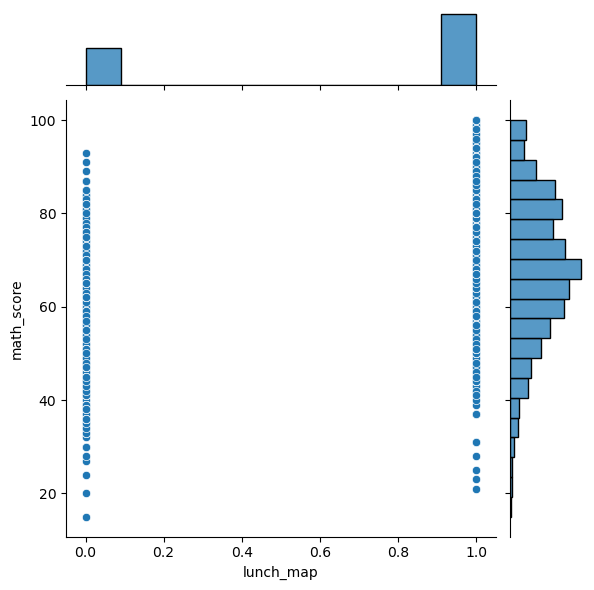

In [819]:
sns.jointplot(x="lunch_map", y="math_score", data=df)

In [820]:
#OBSERVASI SAMPEL/CEK SAMPEL
np.percentile(df.test_prep_map,[90])

array([1.])

In [821]:
##OBSERVASI SAMPEL/CEK SAMPEL
np.percentile(df.test_prep_map,[90])[0]

1.0

In [822]:
##OBSERVASI SAMPEL/CEK SAMPEL
uv = np.percentile(df.test_prep_map,[90])[0]

In [823]:
df[(df.test_prep_map>uv)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,test_prep_map,lunch_map


In [824]:
##OBSERVASI SAMPEL / CEK SAMPEL
##mencegah nilai yang diinput terduplikat (output merah gpp )
df.test_prep_map[(df.test_prep_map > 2*uv)] = 2*uv

C:\Users\alwan\AppData\Local\Temp\ipykernel_28104\388427518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.test_prep_map[(df.test_prep_map > 2*uv)] = 2*uv


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


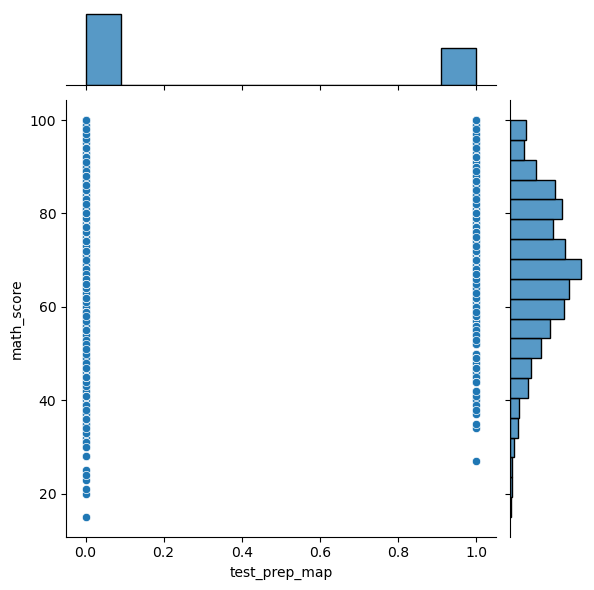

In [825]:
sns.jointplot(x="test_prep_map", y="math_score", data=df)

In [826]:
##MISSING VALUE ( menggunakan mean )
df.parentaleducation_map = df.parental_level_of_education.fillna(df.parental_level_of_education.mean())

C:\Users\alwan\AppData\Local\Temp\ipykernel_28104\517842234.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.parentaleducation_map = df.parental_level_of_education.fillna(df.parental_level_of_education.mean())


In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   int64 
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   test_prep_map                1000 non-null   int32 
 9   lunch_map                    1000 non-null   int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 70.4+ KB


In [828]:
##MISSING VALUE ( menggunakan mean )
df.lunch_map=df.lunch_map.fillna(df.lunch_map.mean())

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   int64 
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   test_prep_map                1000 non-null   int32 
 9   lunch_map                    1000 non-null   int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 70.4+ KB


In [830]:
##MISSING VALUE ( menggunakan mean )
df.test_prep_map=df.test_prep_map.fillna(df.test_prep_map.mean())

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   int64 
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   test_prep_map                1000 non-null   int32 
 9   lunch_map                    1000 non-null   int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 70.4+ KB


In [857]:
##Dummy
df = pd.get_dummies(df)

In [858]:
df.head()

,parental_level_of_education,math_score,reading_score,writing_score,test_prep_map,lunch_map,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,3,59,70,78,1,1,True,False,False,False,False,True,False,False,True,True,False
1,4,96,93,87,0,1,False,True,False,False,False,True,False,False,True,False,True
2,3,57,76,77,0,0,True,False,False,False,False,True,False,True,False,False,True
3,3,70,70,63,0,0,False,True,False,True,False,False,False,True,False,False,True
4,4,83,85,86,0,1,True,False,False,False,False,True,False,False,True,False,True


In [859]:
##Analisis Korelasi
df.corr()

,parental_level_of_education,math_score,reading_score,writing_score,test_prep_map,lunch_map,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
parental_level_of_education,1.000000,0.153079,0.123278,0.165690,-0.004354,-0.017296,-0.019398,0.019398,-0.036177,0.023831,0.007741,0.001552,-0.011530,0.017296,-0.017296,-0.004354,0.004354
math_score,0.153079,1.000000,0.811767,0.790055,0.119925,0.372465,-0.195992,0.195992,-0.040615,-0.121892,-0.104188,0.041261,0.257715,-0.372465,0.372465,0.119925,-0.119925
reading_score,0.123278,0.811767,1.000000,0.948909,0.223132,0.241319,0.215775,-0.215775,-0.024499,-0.065251,-0.086809,0.022856,0.180581,-0.241319,0.241319,0.223132,-0.223132
writing_score,0.165690,0.790055,0.948909,1.000000,0.321520,0.234400,0.281707,-0.281707,-0.025193,-0.080158,-0.107394,0.075124,0.160338,-0.234400,0.234400,0.321520,-0.321520
test_prep_map,-0.004354,0.119925,0.223132,0.321520,1.000000,-0.093498,0.032641,-0.032641,0.029843,-0.011157,-0.045521,0.041391,-0.001155,0.093498,-0.093498,1.000000,-1.000000
lunch_map,-0.017296,0.372465,0.241319,0.234400,-0.093498,1.000000,-0.015708,0.015708,0.045861,-0.040685,-0.014356,0.011498,0.015799,-1.000000,1.000000,-0.093498,0.093498
gender_female,-0.019398,-0.195992,0.215775,0.281707,0.032641,-0.015708,1.000000,-1.000000,0.015810,0.073205,-0.033861,-0.038652,-0.002034,0.015708,-0.015708,0.032641,-0.032641
gender_male,0.019398,0.195992,-0.215775,-0.281707,-0.032641,0.015708,-1.000000,1.000000,-0.015810,-0.073205,0.033861,0.038652,0.002034,-0.015708,0.015708,-0.032641,0.032641
race/ethnicity_group A,-0.036177,-0.040615,-0.024499,-0.025193,0.029843,0.045861,0.015810,-0.015810,1.000000,-0.145522,-0.202298,-0.172249,-0.119636,-0.045861,0.045861,0.029843,-0.029843
race/ethnicity_group B,0.023831,-0.121892,-0.065251,-0.080158,-0.011157,-0.040685,0.073205,-0.073205,-0.145522,1.000000,-0.343204,-0.292225,-0.202966,0.040685,-0.040685,-0.011157,0.011157


In [860]:
##Regresi Linier Non Ganda
X =sn.add_constant(df['parental_level_of_education'])

In [861]:
lm = sn.OLS(df['math_score'], X).fit()

In [862]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     23.95
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.15e-06
Time:                        19:48:09   Log-Likelihood:                -4131.2
No. Observations:                1000   AIC:                             8266.
Df Residuals:                     998   BIC:                             8276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          62.9992      1.093     57.659      0.000      60.855      65.143
parental_level_of_education     1.5670      0.320      4.894      0.000       0.939       2.195
==============================================================================
Omnibus:                       12.308   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.372
Skew:                          -0.254   Prob(JB):                      0.00206
Kurtosis:                       2.802   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [863]:
from sklearn.linear_model import LinearRegression

In [837]:
y=df['math_score']

In [838]:
x=df[['parental_level_of_education']]

In [839]:
lm2 = LinearRegression()

In [840]:
lm2.fit(X,y)

LinearRegression()

In [841]:
print(lm2.intercept_,lm2.coef_)

62.99916557665419 [0.         1.56704704]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


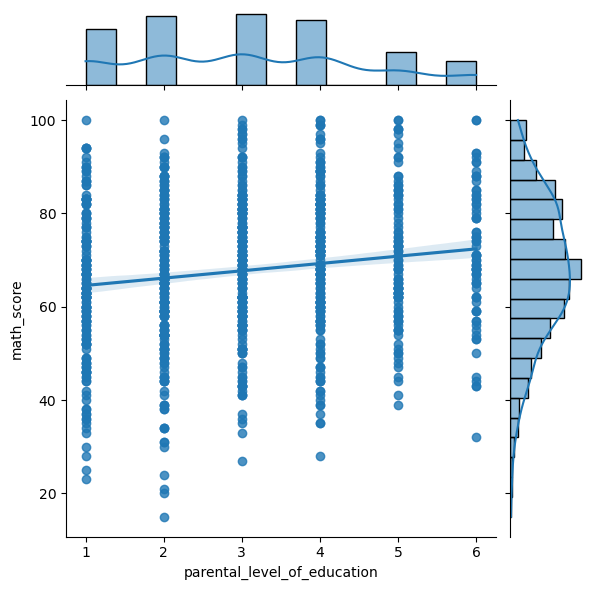

In [842]:
sns.jointplot(x=df['parental_level_of_education'], y=df['math_score'], data=df, kind ='reg')

In [864]:
X =sn.add_constant(df['test_prep_map'])

In [865]:
lm3 = sn.OLS(df['math_score'], X).fit()

In [866]:
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     14.56
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           0.000144
Time:                        20:28:18   Log-Likelihood:                -4135.8
No. Observations:                1000   AIC:                             8276.
Df Residuals:                     998   BIC:                             8285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            66.4863      0.591    112.418      0.000      65.326      67.647
test_prep_map     3.8480      1.008      3.816      0.000       1.869       5.827
==============================================================================
Omnibus:                       13.485   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.705
Skew:                          -0.272   Prob(JB):                      0.00106
Kurtosis:                       2.821   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [867]:
y=df['math_score']


In [868]:
x=df[['lunch_map']]


In [869]:
lm3 = LinearRegression()

In [870]:
lm3.fit(X,y)

LinearRegression()

In [871]:
print(lm3.intercept_,lm2.coef_)

66.48628048780488 [0.         1.56704704]


In [880]:
X =sn.add_constant(df['lunch_map'])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


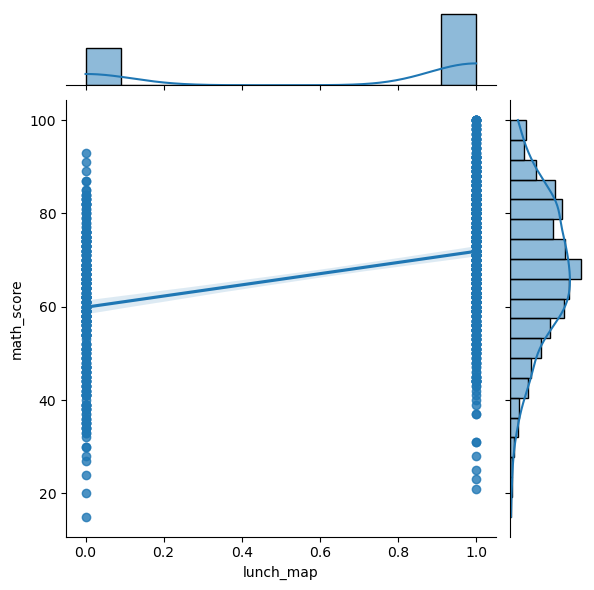

In [881]:
sns.jointplot(x=df['lunch_map'], y=df['math_score'], data=df, kind ='reg')

In [873]:
lm4 = sn.OLS(df['math_score'], X).fit()

In [874]:
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           2.90e-34
Time:                        20:28:31   Log-Likelihood:                -4068.4
No. Observations:                1000   AIC:                             8141.
Df Residuals:                     998   BIC:                             8151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9000      0.768     78.002      0.000      58.393      61.407
lunch_map     11.9848      0.945     12.679      0.000      10.130      13.840
==============================================================================
Omnibus:                       18.075   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.820
Skew:                          -0.332   Prob(JB):                     8.19e-05
Kurtosis:                       2.897   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [875]:
y=df['math_score']


In [876]:
x=df[['test_prep_map']]

In [877]:
lm4 = LinearRegression()


In [878]:
lm3.fit(X,y)

LinearRegression()

In [879]:
print(lm3.intercept_,lm2.coef_)

59.90000000000001 [0.         1.56704704]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


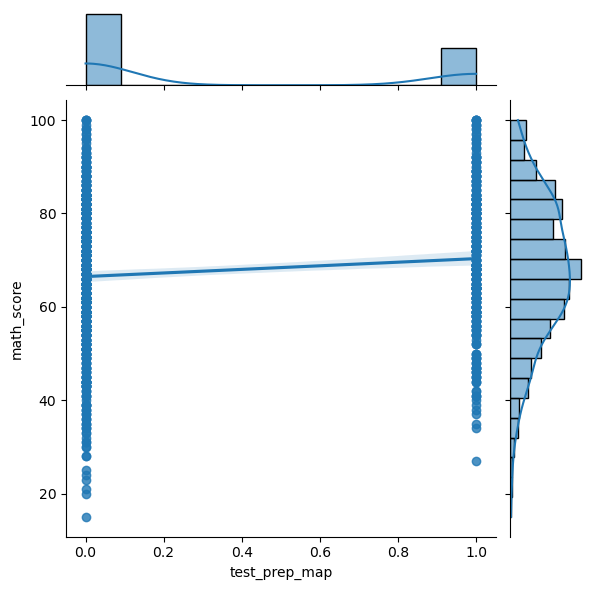

In [885]:
sns.jointplot(x=df['test_prep_map'], y=df['math_score'], data=df, kind ='reg')

In [843]:
##Multiple Linear Regression



In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   parental_level_of_education        1000 non-null   int64
 1   math_score                         1000 non-null   int64
 2   reading_score                      1000 non-null   int64
 3   writing_score                      1000 non-null   int64
 4   test_prep_map                      1000 non-null   int32
 5   lunch_map                          1000 non-null   int32
 6   gender_female                      1000 non-null   bool 
 7   gender_male                        1000 non-null   bool 
 8   race/ethnicity_group A             1000 non-null   bool 
 9   race/ethnicity_group B             1000 non-null   bool 
 10  race/ethnicity_group C             1000 non-null   bool 
 11  race/ethnicity_group D             1000 non-null   bool 
 12  race/ethnicity_group 

In [889]:
df.describe(include="all")

,parental_level_of_education,math_score,reading_score,writing_score,test_prep_map,lunch_map,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,False,False,True,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,508,508,921,802,677,743,857,660,660,656,656
mean,3.070000,67.810000,70.382000,69.140000,0.344000,0.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.489738,15.250196,14.107413,15.025917,0.475279,0.473946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,15.000000,25.000000,15.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,58.000000,61.000000,59.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,68.000000,70.500000,70.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,79.250000,80.000000,80.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##Multiple Linier Regression

In [891]:
##buang semua variabel yang tidak dipakai, variabel terikat serta variabel yang bukan numerik
##cuma pilih variabel terikat
mrl1 =["parental_level_of_education","test_prep_map","lunch_map"]
X_multi = df[mrl1]

In [892]:
X_multi.head()

,parental_level_of_education,test_prep_map,lunch_map
0,3,1,1
1,4,0,1
2,3,0,0
3,3,0,0
4,4,0,1


In [893]:
X_multi.describe()

,parental_level_of_education,test_prep_map,lunch_map
count,1000.000000,1000.000000,1000.000000
mean,3.070000,0.344000,0.660000
std,1.489738,0.475279,0.473946
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000
75%,4.000000,1.000000,1.000000
max,6.000000,1.000000,1.000000


In [894]:
y_multi = df['math_score']

In [895]:
y_multi.describe()

count    1000.000000
mean       67.810000
std        15.250196
min        15.000000
25%        58.000000
50%        68.000000
75%        79.250000
max       100.000000
Name: math_score, dtype: float64

In [896]:
y_multi.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: math_score
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [897]:
X_multi_cons = sn.add_constant(X_multi)


In [898]:
X_multi_cons.head()

,const,parental_level_of_education,test_prep_map,lunch_map
0,1.0,3,1,1
1,1.0,4,0,1
2,1.0,3,0,0
3,1.0,3,0,0
4,1.0,4,0,1


In [899]:
X_multi_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   const                        1000 non-null   float64
 1   parental_level_of_education  1000 non-null   int64  
 2   test_prep_map                1000 non-null   int32  
 3   lunch_map                    1000 non-null   int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 23.6 KB


In [ ]:
lm_multi = sn.OLS(y